In [2]:
!pip install brian2 

     |████████████████████████████████| 1.6MB 4.4MB/s 
     |████████████████████████████████| 5.8MB 28.3MB/s 
  Created wheel for brian2: filename=Brian2-2.3.0.2-cp36-cp36m-linux_x86_64.whl size=1283472 sha256=8f38e942b5d90553a1f78114d1804f54f0339fbedf08fe79ad68ce55b48b21fc
  Stored in directory: /root/.cache/pip/wheels/86/b5/f6/0c8f9eec58c01e4af55a4c79a5e0385aea01ed03e4ec36c4ac
Successfully built brian2
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [0]:
from brian2 import *


In [0]:
from pylab import *
import numpy as np
from collections import Counter
import random 
import math

i have 2 neurons G,H one of them is post synaptic and the other one is pre synaptic 
they are connected with the w wich has a STDP equition and when a spike comes the weigth and apre and apost changes
the plot shows how the weigth changes 




In [0]:
#one post LIF and one pre LIF with diffrent time firing 
start_scope()

taupre = taupost = 20*ms
Apre = 0.01
Apost = -Apre*taupre/taupost*1.05
tmax = 50*ms
N = 1
Vt=-55*mV
Vr=-60*mV
taum=20*ms

eqs = '''
dv/dt  = -(v-Vr)/taum + xi/sqrt(ms)*mV   : volt (unless refractory)
'''
#xi =random input noise 

G = NeuronGroup(N, eqs, threshold='v>Vt', reset='v = Vr',  refractory=5*ms, method='euler')
H=NeuronGroup(N, eqs, threshold='v>Vt', reset='v = Vr', refractory=5*ms, method='euler')
S = Synapses(G, H,
             '''
             w : 1
             dapre/dt = -(apre/taupre) : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             ''')

S.connect(j='i')
G_mon = SpikeMonitor(G)
H_mon=SpikeMonitor(H)
M = StateMonitor(S, 'w', record=True)
run(1000*ms)


In [0]:
#printing weigths and spike times 
print(S.w)
print((G_mon.t)/ms)
print((H_mon.t)/ms)
print(M.w)


<synapses.w: array([0.01390466])>
[  0.   44.5 186.3 306.9 356.2 881.4]
[  0.  321.1 399.3 409.5 726.3 741.4 781.6]
[[0.         0.01       0.01       ... 0.01390466 0.01390466 0.01390466]]


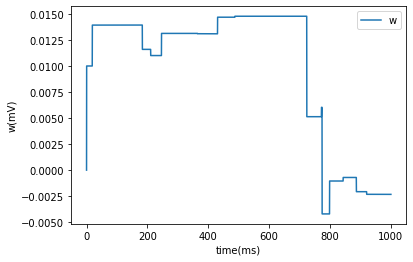

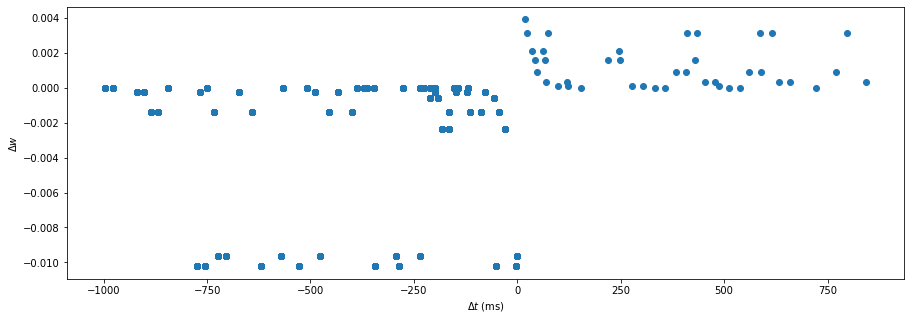

In [170]:
pre=[x/ms for x in list(G_mon.all_values()['t'][0])]
post=[x/ms for x in list(H_mon.all_values()['t'][0])]
wlist=M.w[0]
x=[]
y=[]
for i in post:
  array1=[]
  for j in pre:
    if j<i:
      array1.append(j)
      if len(array1)==0:continue
      else:
        x.append(i-max(array1))
        y.append(wlist[int(i*10)+1]-wlist[int(i*10)])
  for i in pre:
    array1=[]
    for j in post:
      if j<i:
        array1.append(j)
        if len(array1)==0:continue
        else:
          x.append(max(array1)-i)
          y.append(wlist[int(i*10)+1]-wlist[int(i*10)])


plot(M.t/ms,M.w[0],label='w')
legend(loc='best')
xlabel('time(ms)')
ylabel('w(mV)')
show()
figure(figsize=(15,5))
scatter(x,y)
xlabel(r'$\Delta t$ (ms)')
ylabel(r'$\Delta w$')
show()






In [22]:
#exercise 2
# generating random spike trains with given patterns
pattern1_indices=[0,2,5,6,7,8,9]
pattern1_times=[1,2,5,4,7,3,1]*ms
pattern2_indices=[1,3,4,5,7,8,9]
pattern2_times=[1,1,3,2,5,9,8]*ms
patterns=[[1,2,0,0,5,4,7,3,0,1],[1,0,1,3,2,0,5,0,9,8]]

def random_pattern(pattern1_indices, pattern1_times, pattern2_indices, pattern2_times,duration):
  indices     = []
  times       = []
  indexarray     = []
  timearray    = []
  t   = 0*ms
  maximum=0
  for i in patterns:
    if max(i)>maximum:
      maximum=max(i)    
  p2,p1  = 0, 0
  # randomizing patterns
  for i in range(duration):
      rand = random.random()

      if rand  >= 0 and rand  < 0.02* maximum:
          indexarray = pattern1_indices
          timearray = pattern1_times
          p1      +=1
      elif rand  >=0.02 * maximum and rand < maximum:
          indexarray = pattern2_indices
          timearray = pattern2_times
          p2      +=1
      else:
        randomlen = random.randint(1,9)
        indexarray = random.sample(range(10), randomlen)
        timearray = random.sample(range(10), randomlen)*ms
        
         
        
      timearray = [i+t for i in timearray]
      t = round(max(timearray)/ms+1)*ms
      indices.extend(indexarray)
      times.extend(timearray)


  return indices, times


indices, times=random_pattern(pattern1_indices, pattern1_times, pattern2_indices, pattern2_times,50)
print(indices,times)

[1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 0, 2, 5, 6, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 0, 2, 5, 6, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 0, 2, 5, 6, 7, 8, 9, 0, 2, 5, 6, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 0, 2, 5, 6, 7, 8, 9, 0, 2, 5, 6, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 0, 2, 5, 6, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 0, 2, 5, 6, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 0, 2, 5, 6, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 7, 8, 9, 1, 3, 4, 5, 

In [23]:
start_scope()
urestpost_1=-60*mV
urestpost_2=-55*mV
Vr_post1=-55*mV
Vr_post2=-50*mV
tau_pre = tau_post = 20*ms
Apre = 0.01
Apost = -Apre
delta_time=0.1*ms
wmax=1
duration=50*ms
inp_N=10


pre=SpikeGeneratorGroup(inp_N,indices,times)

eqs_post_1='''
  du/dt=-(u-u_rest)/tau + xi/sqrt(ms)*mV:volt
  tau:second
  u_rest:volt
  
  '''
  
post_1=NeuronGroup(1,eqs_post_1,threshold='u>Vr_post1')

post_1.u=urestpost_1
post_1.tau=tau_post
post_1.u_rest=urestpost_1



eqs_post_2='''
du/dt=-(u-u_rest)/tau + xi/sqrt(ms)*mV:volt
  tau:second
  u_rest:volt
  
  '''
post_2=NeuronGroup(1,eqs_post_2,threshold='u>Vr_post2',reset='u=urestpost_2')
post_2.u=urestpost_2
post_2.tau=tau_post
post_2.u_rest=urestpost_2

S1=Synapses(pre,post_1,
                 '''w:1
             dapre/dt = -(apre/tau_pre) : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
              w=clip(w+apost,0,wmax)
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             w=clip(w+apre,0,wmax)
             ''') 
S1.connect(p=1)
S1.w=[random.randrange(0,2) for i in range(10)]
S2=Synapses(pre,post_1,
                 '''w:1
             dapre/dt = -(apre/tau_pre) : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
              w=clip(w+apost,0,wmax)
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             w=clip(w+apre,0,wmax)
             ''') 
S2.connect(p=1)
S2.w=[random.randrange(0,3) for i in range(10)]
u_mon_1=StateMonitor(post_1,'u',record=True)
u_mon_2=StateMonitor(post_2,'u',record=True)

ws1=StateMonitor(S1,['w'],record=True)
ws2=StateMonitor(S2,['w'],record=True)
spikepost1=SpikeMonitor(post_1)
spikepost2=SpikeMonitor(post_2)
spikepre=SpikeMonitor(pre)

run(duration)


WARNING    "tau_post" is an internal variable of group "synapses", but also exists in the run namespace with the value 20. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


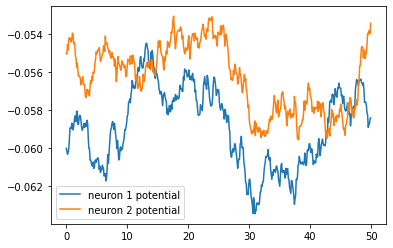

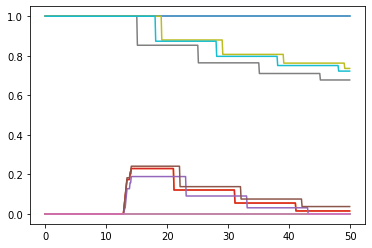

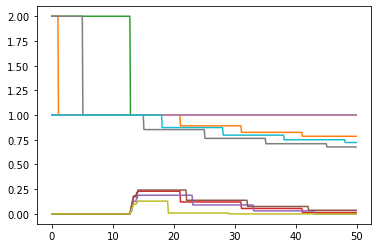

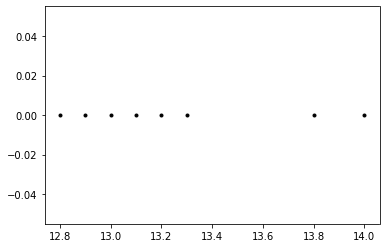

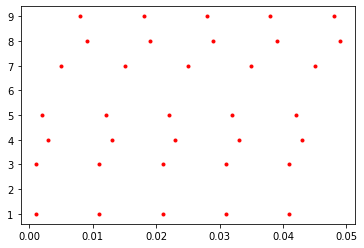

In [24]:
#ploting potentiation 
plot(u_mon_1.t/ms, u_mon_1.u[0], label='neuron 1 potential')
plot(u_mon_2.t/ms, u_mon_2.u[0], label='neuron 2 potential')
legend()
show()
#ploting weigth
for i in range(10):
  plot(ws1.t/ms, ws1.w[i])

show()
for i in range(10):
  plot(ws2.t/ms, ws2.w[i])
show()
#ploting spikes
plot(spikepost1.t/ms, spikepost1.i, '.k')
plot(spikepost2.t/ms, spikepost2.i, '.r')
show()
plot(spikepre.t, spikepre.i, '.r')
show()


In [25]:
#exercise3
#using exercise 2 randpm pattern function 
#simulating 
start_scope()
urestpost_1=-60*mV
urestpost_2=-55*mV
urestpost_3=-65*mV
Vr_post1=-55*mV
Vr_post2=-50*mV
Vr_post3=-60*mV
tau_pre = tau_post = 20*ms
Apre = 0.01
Apost = -Apre
delta_time=0.1*ms
wmax=1
duration=50*ms
inp_N=10


pre=SpikeGeneratorGroup(inp_N,indices,times)

eqs_post_1='''
  du/dt=-(u-u_rest)/tau + xi/sqrt(ms)*mV:volt
  tau:second
  u_rest:volt
  
  '''
  
post_1=NeuronGroup(1,eqs_post_1,threshold='u>Vr_post1')

post_1.u=urestpost_1
post_1.tau=tau_post
post_1.u_rest=urestpost_1



eqs_post_2='''
du/dt=-(u-u_rest)/tau + xi/sqrt(ms)*mV:volt
  tau:second
  u_rest:volt
  
  '''
post_2=NeuronGroup(1,eqs_post_2,threshold='u>Vr_post2',reset='u=urestpost_2')
post_2.u=urestpost_2
post_2.tau=tau_post
post_2.u_rest=urestpost_2
eqs_post_3='''
du/dt=-(u-u_rest)/tau + xi/sqrt(ms)*mV:volt
  tau:second
  u_rest:volt
  
  '''
post_3_inh=NeuronGroup(1,eqs_post_3,threshold='u>Vr_post3',reset='u=urestpost_3')
post_3_inh.u=urestpost_3
post_3_inh.tau=tau_post
post_3_inh.u_rest=urestpost_3

S1=Synapses(pre,post_1,
                 '''w:1
             dapre/dt = -(apre/tau_pre) : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
              w=clip(w+apost,0,wmax)
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             w=clip(w+apre,0,wmax)
             ''') 
S1.connect(p=1)
S1.w=[random.randrange(0,2) for i in range(10)]
S2=Synapses(pre,post_1,
                 '''w:1
             dapre/dt = -(apre/tau_pre) : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
              w=clip(w+apost,0,wmax)
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             w=clip(w+apre,0,wmax)
             ''') 
S2.connect(p=1)
S3=Synapses(pre,post_3_inh,
                 '''
             w:1
             dapre/dt = -(apre/tau_pre) : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
              w=clip(w+apost,0,wmax)
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             w=clip(w+apre,0,wmax)
             ''') 
S3.connect(p=1)
S3.w=[-random.randrange(0,3) for i in range(10)]
S4=Synapses(post_1,post_3_inh,
                 '''
             w:1
             dapre/dt = -(apre/tau_pre) : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
              w=clip(w+apost,0,wmax)
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             w=clip(w+apre,0,wmax)
             ''') 
S4.connect(p=1)
S4.w=-random.randrange(0,3) 

S5=Synapses(post_2,post_3_inh,
                 '''
             w:1
             dapre/dt = -(apre/tau_pre) : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
              w=clip(w+apost,0,wmax)
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             w=clip(w+apre,0,wmax)
             ''') 
S5.connect(p=1)
S5.w=-random.randrange(0,3)

u_mon_1=StateMonitor(post_1,'u',record=True)
u_mon_2=StateMonitor(post_2,'u',record=True)
u_mon_3=StateMonitor(post_3_inh,'u',record=True)


ws1=StateMonitor(S1,['w'],record=True)
ws2=StateMonitor(S2,['w'],record=True)
ws3=StateMonitor(S3,['w'],record=True)
ws4=StateMonitor(S4,['w'],record=True)
ws5=StateMonitor(S5,['w'],record=True)

spikepost1=SpikeMonitor(post_1)
spikepost2=SpikeMonitor(post_2)
spikepost3inh=SpikeMonitor(post_3_inh)
spikepre=SpikeMonitor(pre)

run(duration)


INFO       No numerical integration method specified for group 'neurongroup_5', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
WARNING    "tau_post" is an internal variable of group "synapses_4", but also exists in the run namespace with the value 20. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "tau_pre" is an internal variable of group "synapses_5", but also exists in the run namespace with the value 20. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "tau_post" is an internal variable of group "synapses_7", but also exists in the run namespace with the value 20. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "tau_pre" is an internal variable of group "synapses_7", but also exists in the run namespace with the value 20. * m

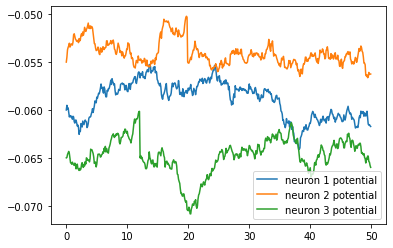

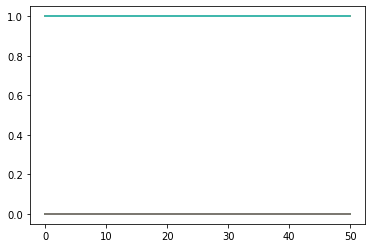

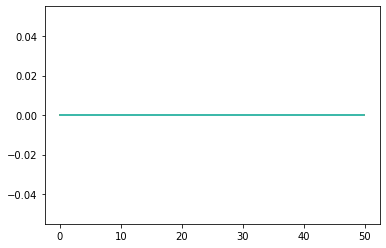

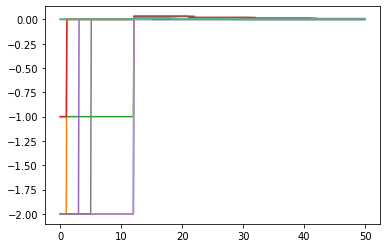

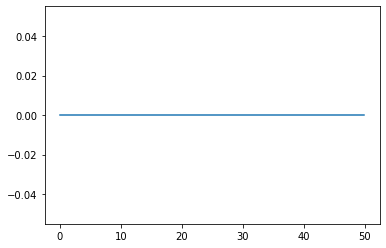

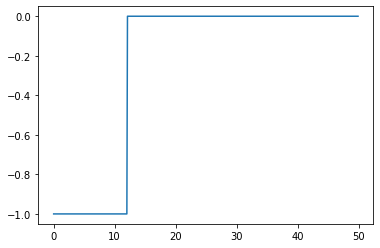

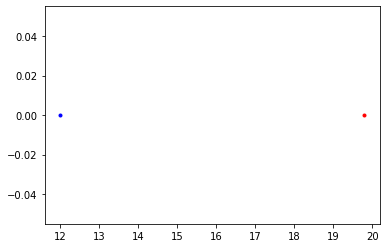

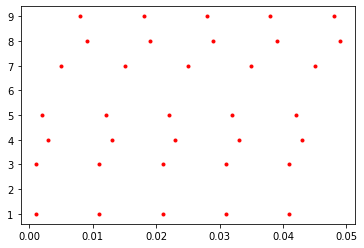

In [26]:
#ploting potentiation 
plot(u_mon_1.t/ms, u_mon_1.u[0], label='neuron 1 potential')
plot(u_mon_2.t/ms, u_mon_2.u[0], label='neuron 2 potential')
plot(u_mon_3.t/ms, u_mon_3.u[0], label='neuron 3 potential')
legend()
show()
#ploting weigth
for i in range(10):
  plot(ws1.t/ms, ws1.w[i])

show()
for i in range(10):
  plot(ws2.t/ms, ws2.w[i])
show()
for i in range(10):
  plot(ws3.t/ms, ws3.w[i])
show()
plot(ws4.t/ms, ws4.w[0])
show()
plot(ws5.t/ms, ws5.w[0])
show()
#ploting spikes
plot(spikepost1.t/ms, spikepost1.i, '.k')
plot(spikepost2.t/ms, spikepost2.i, '.r')
plot(spikepost3inh.t/ms, spikepost3inh.i, '.b')
show()
plot(spikepre.t, spikepre.i, '.r')
show()
